# Problem
You're going out, need umbrella or not?

- State: Rainy, Sunny, Cloudy
- Action: Take Umbrella, Don't Take Umbrella
- Reward: -10 if you get wet, +10 if you stay dry
            -5 if you take umbrella, +5 if you don't take umbrella
- Transition: 0.9 chance of staying in the same state, 0.1 chance of transitioning to another state
- Discount Factor: 0.9


In [65]:
import numpy as np
import matplotlib.pyplot as plt

## Initialize Attributes and Policy

In [66]:
state = [[1, 0, 0], # Rainy
         [0, 1, 0], # Cloudy
         [0, 0, 1]] # Sunny

state = np.array(state)

state_name = ['Rainy', 'Cloudy', 'Sunny']
action = ['Take umbrella', 'Do not take umbrella']

action = np.array(action)

reward = [[1, 0, 0, 1, -1], # Rainy and take umbrella
          [0, 1, 0, 1, -1], # Cloudy and take umbrella
          [0, 0, 1, 1, -5], # Sunny and take umbrella
          [1, 0, 0, 1, -5], # Rainy and don't take umbrella
          [0, 1, 0, 1, -1], # Cloudy and don't take umbrella
          [0, 0, 1, 1, -1]] # Sunny and don't take umbrella

reward = np.array(reward)

                    #   Rainy   Cloudy Sunny
transition =            [[0.7,   0.3,   0], # Rainy
                        [0.4,   0.4,   0.2], # Cloudy
                        [0.1,   0.3,   0.6], # Sunny

                        [0.3,   0.4,   0.3], # Rainy
                        [0,     0.7,   0.3], # Cloudy
                        [0,     0.4,   0.6]] # Sunny

discount = 0.9
epsilon = 0.01


In [67]:
def value_determine(state, action, reward, transition, discount, epsilon):
    value = np.zeros(len(state))
    while True:
        new_value = np.zeros(len(state))
        for i in range(len(state)):
            for j in range(len(action)):
                reward_state  = j * len(state) + i
                new_value[i] = reward[reward_state][-1] + discount * np.sum(transition[reward_state] * value)
        if np.max(np.abs(value - new_value)) < epsilon:
            break
        value = new_value
    return value

In [68]:
model = value_determine(state, action, reward, transition, discount, epsilon)
print(model)

[-15.38247468  -9.90302263  -9.90302263]


In [69]:
# optimal policy
policy = {}
for i in range(len(state)):
    policy[i] = np.argmax([reward[j * len(state) + i][-1] + discount * np.sum(transition[j * len(state) + i] * model) for j in range(len(action))])

for i in range(len(policy)):
    print('In state', state_name[i], 'the optimal policy is to', action[policy[i]])

In state Rainy the optimal policy is to Take umbrella
In state Cloudy the optimal policy is to Do not take umbrella
In state Sunny the optimal policy is to Do not take umbrella


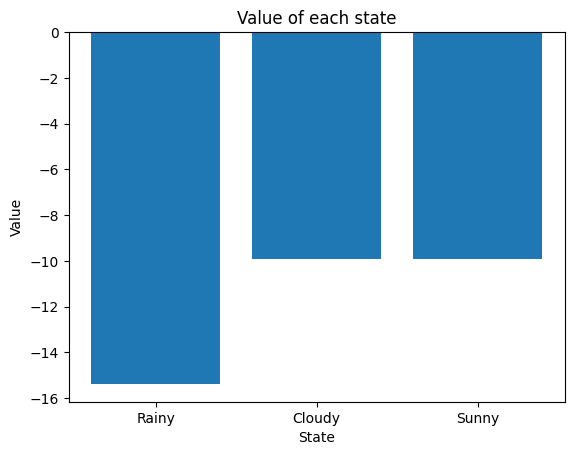

In [70]:
# Plotting
plt.bar(state_name, model)
plt.ylabel('Value')
plt.xlabel('State')
plt.title('Value of each state')
plt.show()
